In [1]:
import os
import numpy as np
import rasterio
import glob
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from Generator import Data
from sklearn.ensemble import RandomForestClassifier
from matplotlib import colors
%matplotlib inline

<img src="http://drive.google.com/uc?export=view&id=1Qp2JK--9TNsmlGAgoPeuJsSOCt9K0XZU">


In [2]:
os.chdir('/home/dlvm/RF_CRF/data/')

Impervious surfaces (RGB: 255, 255, 255) </br>
Building (RGB: 0, 0, 255)</br>
Low vegetation (RGB: 0, 255, 255)</br>
Tree (RGB: 0, 255, 0)</br>
Car (RGB: 255, 255, 0)</br>
Clutter/background (RGB: 255, 0, 0)</br>



/home/dlvm/anaconda3/lib/python3.8/site-packages/rasterio/__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
<ipython-input-3-40c2d4dc8b79>:1: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  Features_vector = Data(30, 35)


[0 1 2 3 4 5]


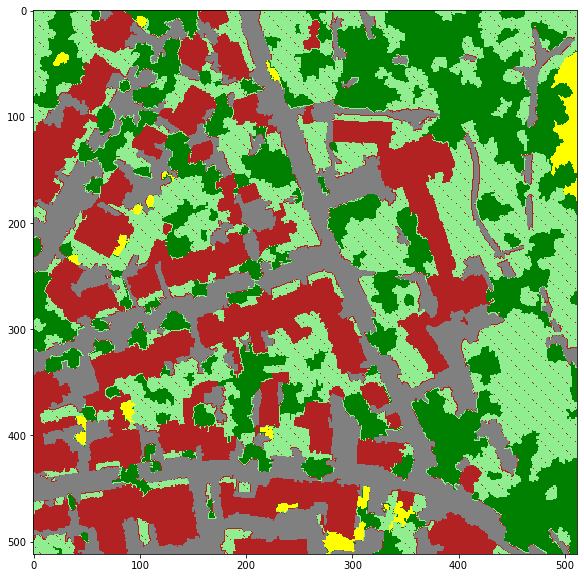

[0 1 2 3 4 5]


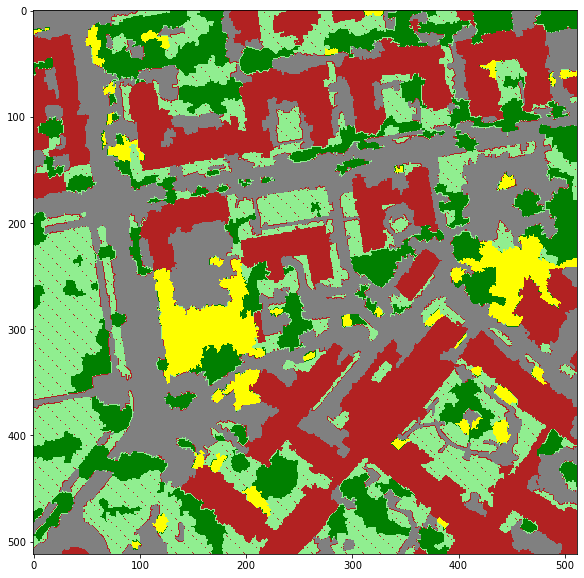

[0 1 2 3 4 5]


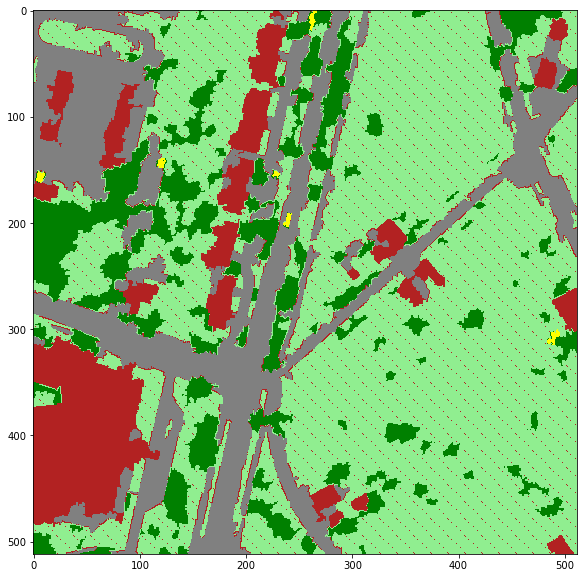

[0 1 2 3 4 5]


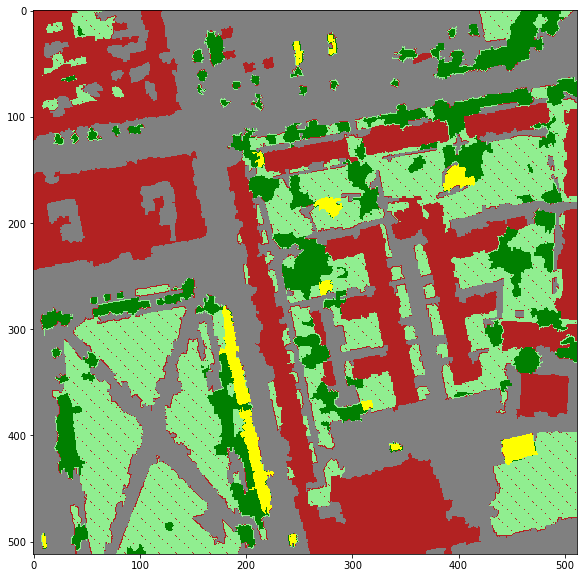

[0 1 2 3 4 5]


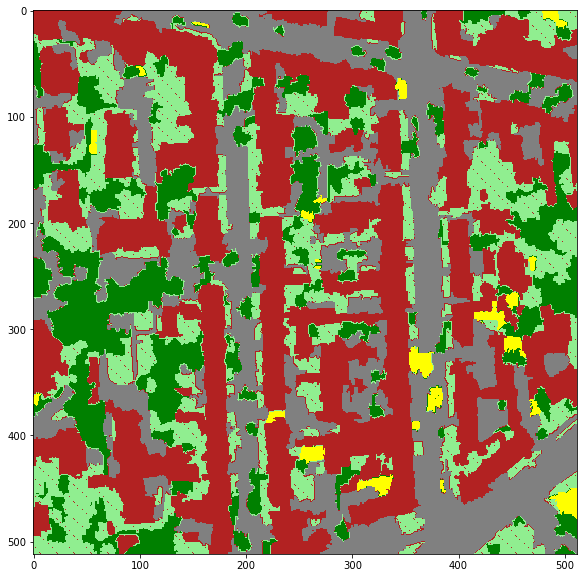

In [3]:
Features_vector = Data(4, 35)

In [4]:
Features_vector = np.array(Features_vector)
Features_vector.shape

(11591, 22)

In [5]:
X = Features_vector[:,1:-1].reshape((-1,Features_vector.shape[1]-2))
y = Features_vector[:,-1].reshape((-1,1))

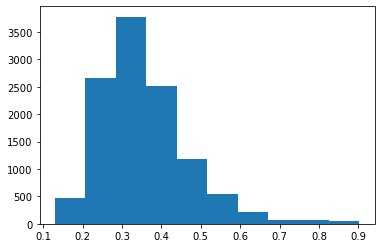

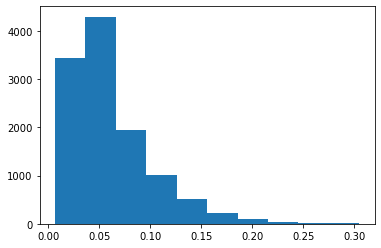

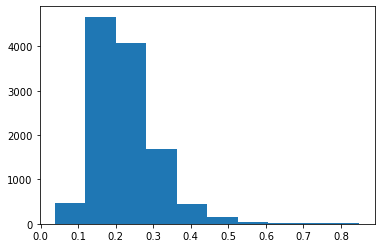

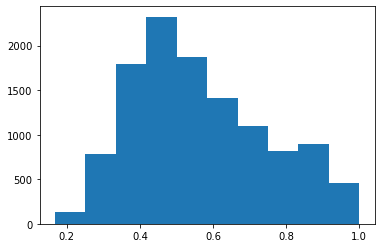

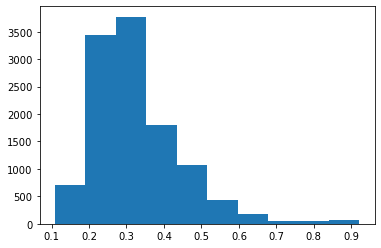

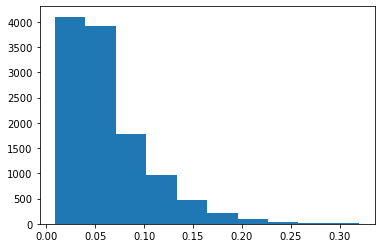

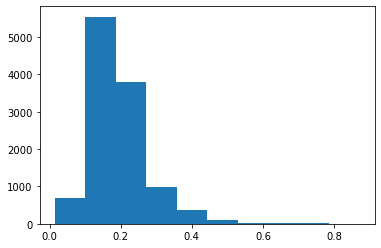

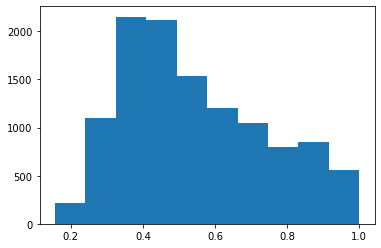

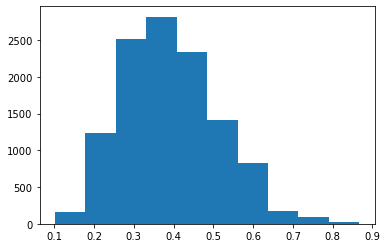

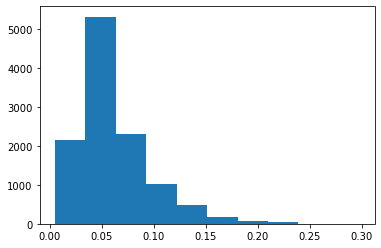

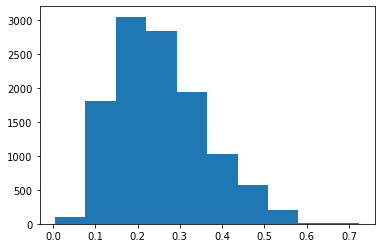

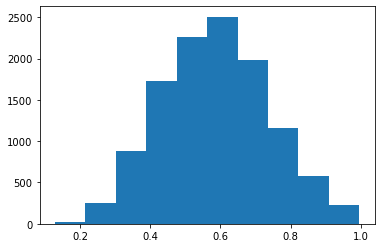

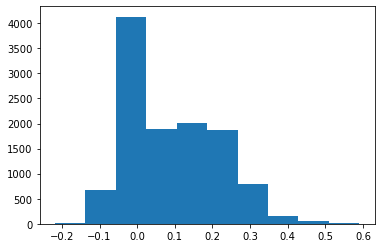

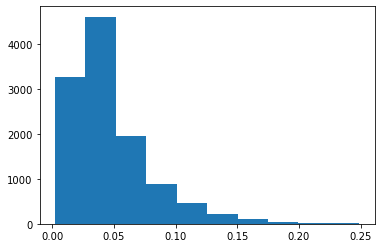

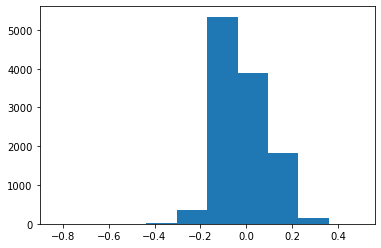

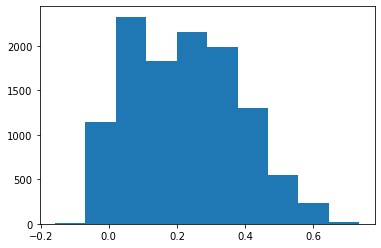

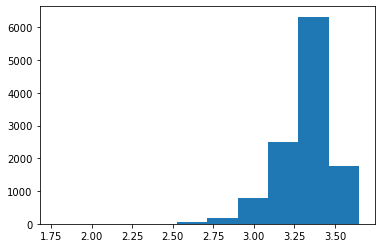

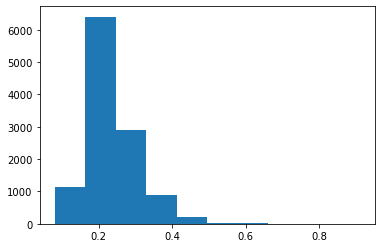

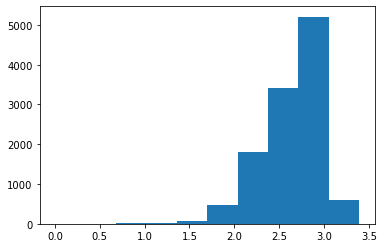

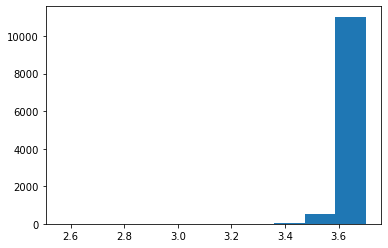

In [6]:
for i in range(X.shape[1])[:]:
    plt.hist(X[:,i])
    plt.show()

In [7]:
#pca = PCA(n_components=10)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape,X_test.shape)

(9272, 20) (2319, 20)


In [81]:
def plot_decision_surface(clf, X, l):
    h = 0.02
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(20, 15))
    plt.contourf(xx, yy, Z, cmap = 'terrain', alpha = 0.5,)
    plt.scatter(X[:,0], X[:,1],
                c = l, cmap = 'plasma',
                edgecolors='k')
    plt.show()

In [82]:
def fit_XGBoost(X_train, y_train):
    
    y_train = y_train.ravel()
    g = [x for x in range(X_train[:,0].shape[0])]
    g = random.sample(g, k = 1000)
    model = XGBClassifier(max_depth=15, n_estimators=500)

    model.fit(X_train[g, :], y_train[g])
    #plot_decision_surface(model,X_train[g, :],y_train[g])
    return model

def fit_RF(X_train, y_train):
    
    y_train = y_train.ravel()
    g = [x for x in range(X_train[:,0].shape[0])]
    g = random.sample(g, k = 200)
    model = RandomForestClassifier(max_depth=15, n_estimators=500)

    model.fit(X_train[g, :], y_train[g])
    #plot_decision_surface(model,X_train[g, :],y_train[g])
    return model


In [83]:
clf = fit_RF(X_train, y_train)

Polynomial kernel. It is popular in image processing. ...</br>
4.2. Gaussian kernel. ...</br>mc
4.3. Gaussian radial basis function (RBF) ...</br>
4.4. Laplace RBF kernel. ...</br>
4.5. Hyperbolic tangent kernel. ...</br>
4.6. Sigmoid kernel. ...</br>
4.7. Bessel function of the first kind Kernel. ...</br>
4.8. ANOVA radial basis kernel.</br>

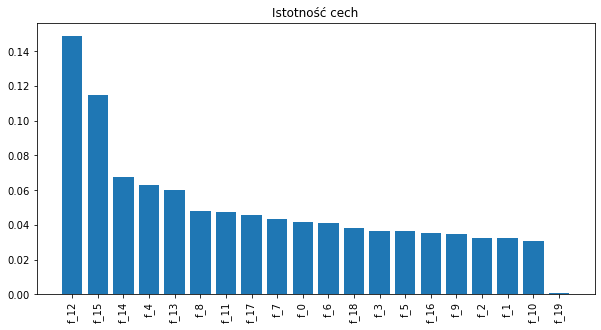

In [84]:
bands = ['f_' + str(x) for x in range((X_train.shape[0]))]
indices = np.argsort(clf.feature_importances_)[::-1].astype(np.int8)
bands =[bands[x] for x in indices]

plt.figure(figsize=(10,5))
plt.title("Istotność cech")

plt.bar(range(len(bands)),clf.feature_importances_[indices])
plt.xticks(range(len(bands)), bands, rotation = 90)
plt.show()

In [85]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = clf.predict(X_test)
y_test_ = y_test
y_test_ = y_test_.ravel()

acc = accuracy_score(y_test, y_pred, normalize = True)
print('Accuracy %.2f' % acc)

label_names = ['Impervious surfaces', 'Building', 'Low vegetation', 'Tree', 'Car', 'background']
cr = classification_report(y_test_, y_pred, target_names = label_names)

print(cr)

Accuracy 0.64
                     precision    recall  f1-score   support

Impervious surfaces       0.61      0.72      0.66       668
           Building       0.62      0.44      0.52       494
     Low vegetation       0.70      0.81      0.75       724
               Tree       0.58      0.50      0.54       389
                Car       0.00      0.00      0.00         7
         background       1.00      0.08      0.15        37

           accuracy                           0.64      2319
          macro avg       0.58      0.43      0.44      2319
       weighted avg       0.64      0.64      0.63      2319



/home/dlvm/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
FV = np.load('/home/dlvm/RF_CRF/data/Features_vector_1.npy')
SSlic = np.load('/home/dlvm/RF_CRF/data/segments_slic_1.npy')
Image = np.load('/home/dlvm/RF_CRF/data/Image_1.npy')

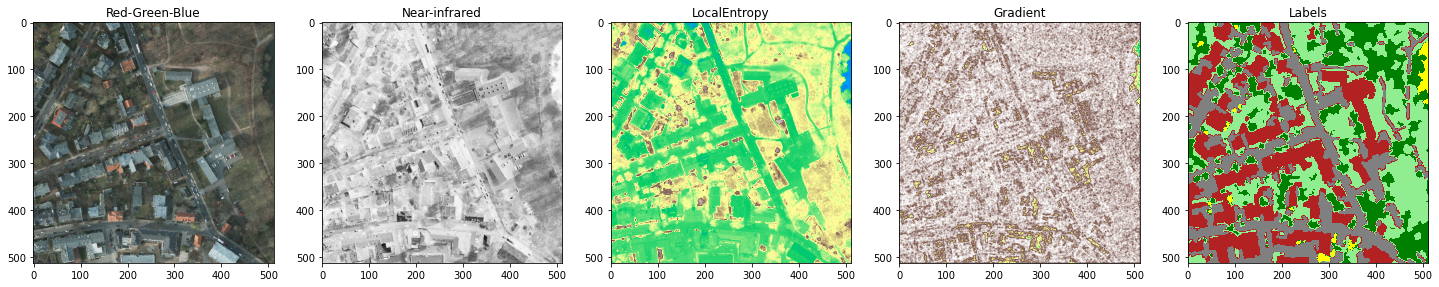

In [87]:
fig,  (ax1, ax2,ax3, ax4, ax5) = plt.subplots(1, 5,figsize=(25,25))
fig.set_figwidth(25,25)
cmp = colors.ListedColormap(['gray', 'firebrick', 'lightgreen', 'green','yellow' ])
bounds = [0, 1, 2, 3, 4, 5]       
norm = colors.BoundaryNorm(bounds, cmp.N)
        
ax1.imshow(Image[:,:,:3])
ax1.set_title('Red-Green-Blue')
ax2.imshow(Image[:,:,3],cmap=plt.get_cmap('Greys'))
ax2.set_title('Near-infrared')
ax3.imshow(Image[:,:,4],cmap=plt.get_cmap('terrain'))
ax3.set_title('LocalEntropy')
ax4.imshow(Image[:,:,5],cmap=plt.get_cmap('terrain'))
ax4.set_title('Gradient')
ax5.imshow(SSlic, cmap = cmp,norm = norm)
ax5.set_title('Labels')
plt.show()

In [88]:
Xtest = FV[:,1:-1].reshape((-1,FV.shape[1]-2))
Ytest = FV[:,-1].reshape((-1,1))

In [89]:
y_pred = clf.predict(Xtest)

### Test

In [90]:
Segments_raw = np.load('/home/dlvm/RF_CRF/data/Segments_1.npy')
for i in FV[:,0].reshape((-1)):
    Segments_raw[Segments_raw == i] = y_pred[int(i)-1]

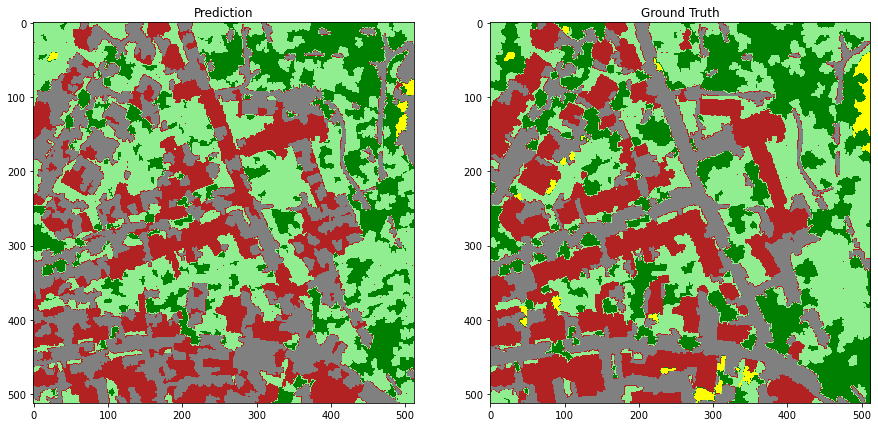

In [91]:
fig,  (ax1, ax2) = plt.subplots(1, 2,figsize=(15,15))

ax1.imshow(Segments_raw, cmap = cmp,norm = norm)
ax1.set_title('Prediction')

ax2.imshow(SSlic, cmap = cmp,norm = norm)
ax2.set_title('Ground Truth')
plt.show()


In [92]:
n_classes=5
from sklearn.metrics import roc_curve, auc

In [79]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[ i], y_pred[ i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

TypeError: Singleton array 2.0 cannot be considered a valid collection.

In [21]:
segments_slic = slic(Image, n_segments=2000, compactness=.11, sigma=.1,start_label=1)


y_pred = clf.predict(X)
y_test_ = y
y_test_ = y_test_.ravel()

NameError: name 'slic' is not defined

In [ ]:
plt.imshow(segments_slic)

In [ ]:
plt.imshow(Image[:,:,:3])

In [ ]:
plt.imshow(Mask)